Dúvida comum: "Eu uso Jupyter Notebook no VScode, tenho receio de executar esses comandos direto no terminal e depois o funcionamento da GPU não ocorrer quando for rodar o treinamento dos modelos a partir do Jupyter Notebook. Devo fazer a instalação dos driver já a partir do notebook para evitar erros futuros?"

Resposta: Embora a execução desses comandos no terminal não interfira diretamente no Jupyter Notebook no VSCode, a instalação e configuração adequada dos drivers de GPU e do CUDA são fundamentais para garantir que sua GPU seja usada corretamente ao treinar modelos, independentemente do ambiente (terminal, VSCode, Jupyter, etc.).

No entanto, a instalação de drivers de GPU e CUDA não é algo que normalmente seria feito a partir de um notebook Jupyter, mesmo se estiver rodando no VSCode. O Jupyter Notebook é principalmente para desenvolvimento interativo, análise de dados e prototipagem, e não é o ambiente mais adequado para tarefas administrativas do sistema.

Aqui estão algumas considerações:

1. **Instalação do Sistema**: A instalação de drivers e do CUDA afeta todo o sistema operacional e não apenas um ambiente ou aplicação específica. Portanto, é preferível e mais seguro fazer essas instalações através do terminal.

2. **Permissões**: Algumas das operações, como a instalação de drivers, requerem permissões elevadas (sudo). Executar comandos que requerem tais permissões dentro de um notebook Jupyter pode ser arriscado.

3. **Feedback Interativo**: O terminal fornece feedback interativo durante a instalação, o que é útil em caso de erros ou problemas. No notebook Jupyter, certos prompts ou feedbacks podem não ser exibidos corretamente.

4. **Reinicialização**: Após instalar os drivers da NVIDIA, geralmente é necessário reiniciar o sistema. Se você estiver trabalhando dentro do Jupyter Notebook, terá que interromper seu trabalho e reiniciar de qualquer maneira.

5. **Funcionamento no Jupyter após Instalação via Terminal**: Após instalar e configurar tudo corretamente via terminal, o Jupyter Notebook (rodando no VSCode ou em qualquer outro lugar) será capaz de acessar e utilizar a GPU sem problemas, desde que as bibliotecas e frameworks que você está usando (como TensorFlow ou PyTorch) estejam configurados corretamente para GPU.

Em resumo, é recomendado que você realize a instalação e configuração dos drivers de GPU e do CUDA através do terminal. Após a instalação correta, o uso da GPU a partir do Jupyter Notebook no VSCode (ou qualquer outro ambiente) não será um problema. Se você seguir o guia de instalação passo a passo e garantir que tudo esteja configurado corretamente, sua GPU funcionará como esperado em todos os seus ambientes de desenvolvimento.

# Passo-a-passo GPU Nvidia e CUDA no Ubuntu

Instalar drivers de GPU e CUDA no Ubuntu é uma tarefa relativamente direta, mas envolve várias etapas. Aqui está um guia passo a passo para ajudar nesse processo:

1. **Identificar sua GPU NVIDIA**:
   
   Abra um terminal e use o seguinte comando para identificar sua GPU:

   ```
   lspci | grep -i nvidia
   ```

2. **Desinstale quaisquer drivers NVIDIA pré-instalados**:

   Antes de instalar os drivers mais recentes, é uma boa prática remover qualquer driver antigo para evitar conflitos.

   ```
   sudo apt-get purge nvidia*
   ```

3. **Adicione o PPA (Personal Package Archive) da NVIDIA**:

   ```
   sudo add-apt-repository ppa:graphics-drivers/ppa
   sudo apt-get update
   ```

4. **Instale o driver recomendado**:

   Você pode usar a ferramenta `ubuntu-drivers` para listar os drivers disponíveis e recomendados para sua GPU:

   ```
   ubuntu-drivers devices
   ```

   Em seguida, instale o driver recomendado usando o comando:

   ```
   sudo apt-get install nvidia-driver-XXXXX
   ```

   Onde `XXXXX` é o número da versão recomendada.

5. **Reinicie o computador**:

   ```
   sudo reboot
   ```
   
6. **Verifique a instalação do driver**:

   Depois de reiniciar, você pode verificar se o driver foi instalado corretamente com:

   ```
   nvidia-smi
   ```   
   Isso mostrará informações sobre sua GPU e a versão do driver instalado.

Se tudo correr bem deve aparecer uma mensagem como essa no seu terminal:

Para escolher os drivers corretos você precisará saber a arquitetura de sua máquina e versão da distro Linux em uso:
    
```
uname -m
```

As respostas típicas podem incluir:

    x86_64: Indica que você está executando uma versão de 64 bits do Linux em uma máquina Intel ou AMD.
    i686 ou i386: Indica que você está executando uma versão de 32 bits do Linux em uma máquina Intel ou AMD.
    ppc64le: Indica que você está executando em uma arquitetura PowerPC Little Endian.
    arm64 ou aarch64: Indica que você está executando em uma arquitetura ARM de 64 bits.


Para saber a sua versão da distribuição do Linux que está usando, digite no terminal:

```
lsb_release -a
```

https://developer.nvidia.com/cuda-downloads?target_os=Linux&target_arch=x86_64&Distribution=Ubuntu&target_version=22.04&target_type=deb_local

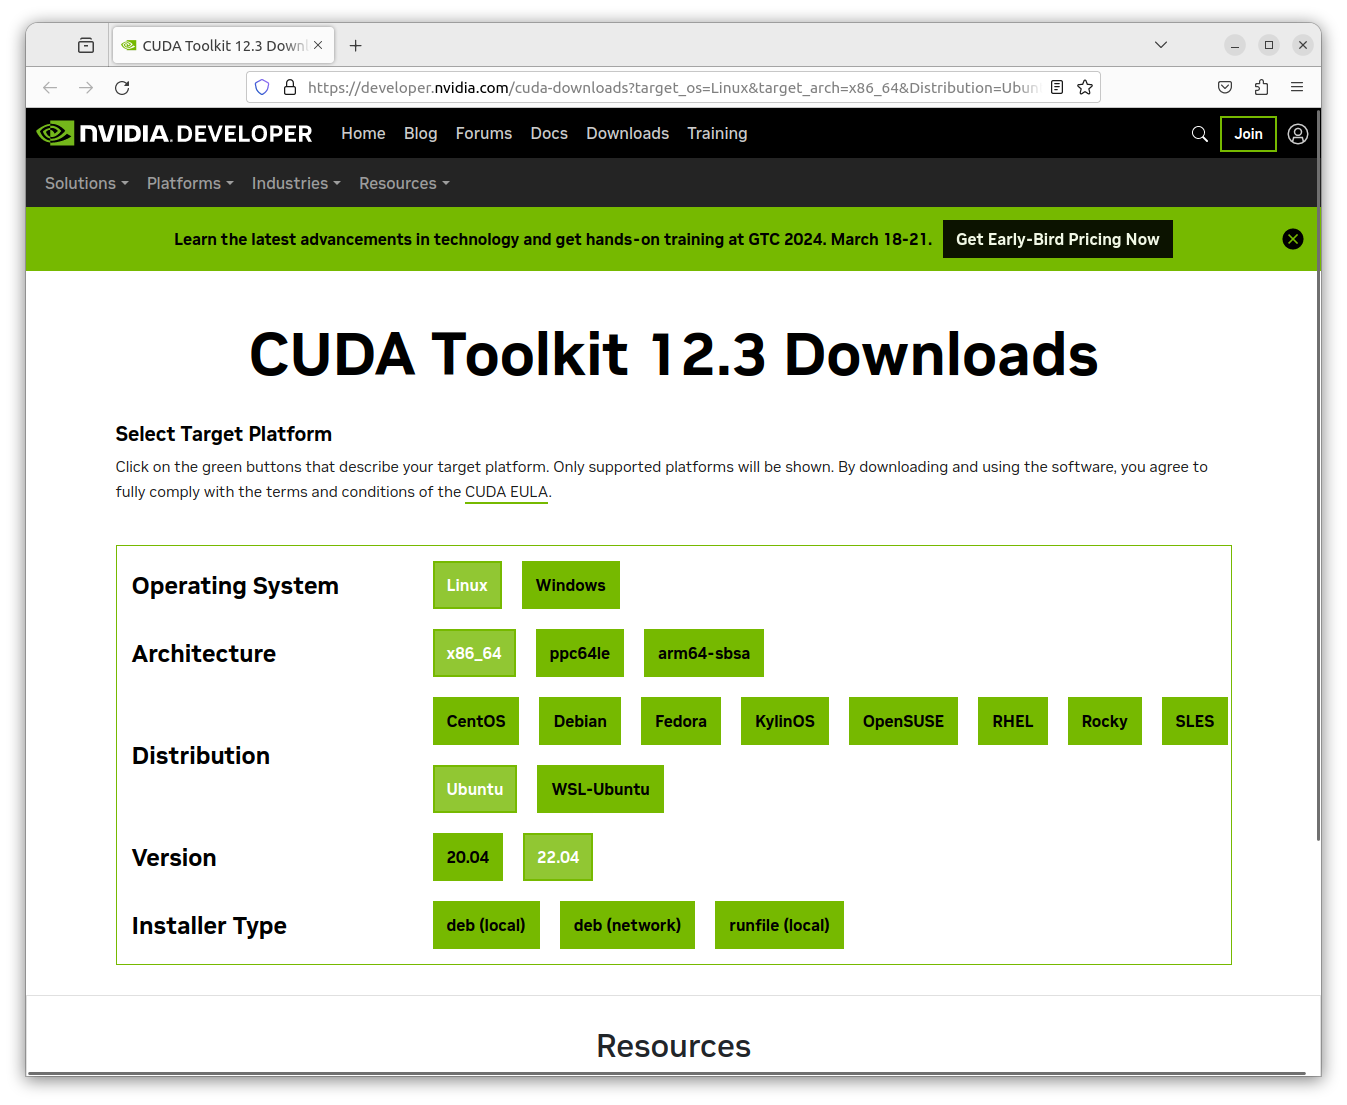

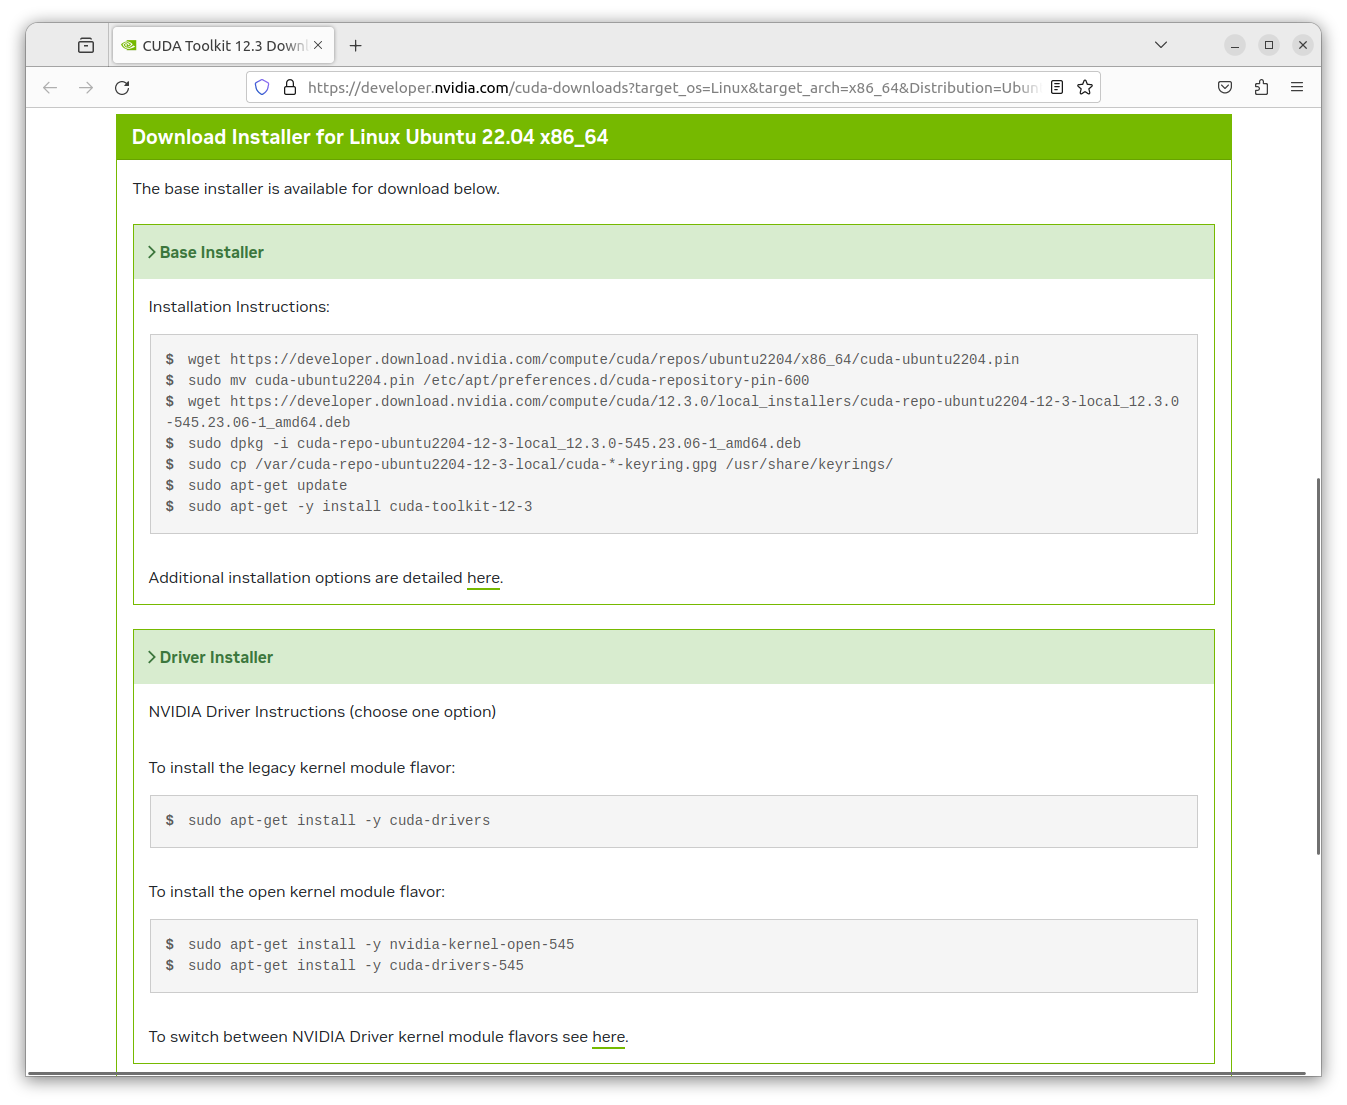

7. **Instale o CUDA Toolkit**:

   a. Visite o [site oficial da NVIDIA para CUDA Toolkit](https://developer.nvidia.com/cuda-downloads).

   b. Selecione as opções adequadas para sua distribuição, versão, arquitetura e, em seguida, escolha a opção `.deb (local)`.

   c. Siga as instruções de instalação fornecidas na página, que geralmente se parecem com:

   ```
   wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/cuda-ubuntu2204.pin
   sudo mv cuda-ubuntu2204.pin /etc/apt/preferences.d/cuda-repository-pin-600
   wget https://developer.download.nvidia.com/compute/cuda/12.3.0/local_installers/cuda-repo-ubuntu2204-12-3-local_12.3.0-545.23.06-1_amd64.deb
   sudo dpkg -i cuda-repo-ubuntu2204-12-3-local_12.3.0-545.23.06-1_amd64.deb
   sudo cp /var/cuda-repo-ubuntu2204-12-3-local/cuda-*-keyring.gpg /usr/share/keyrings/
   sudo apt-get update
   sudo apt-get -y install cuda-toolkit-12-3
   ```

8. **Configurar variáveis de ambiente**:

   Adicione as seguintes linhas ao final do arquivo `~/.bashrc` para configurar as variáveis de ambiente necessárias:

   ```
   export PATH=/usr/local/cuda/bin:$PATH
   export LD_LIBRARY_PATH=/usr/local/cuda/lib64:$LD_LIBRARY_PATH
   ```

   Para adicionar essas linhas diretamente do terminal você pode usar:
   ```
   echo "export PATH=/usr/local/cuda/bin:$PATH" >> ~/.bashrc
   echo "export LD_LIBRARY_PATH=/usr/local/cuda/lib64:$LD_LIBRARY_PATH" >> ~/.bashrc
   ```

   Em seguida, aplique as mudanças:

   ```
   source ~/.bashrc
   ```

9. **Verifique a instalação do CUDA**:

   ```
   nvcc --version
   ```

   Isso deve mostrar a versão do CUDA que você instalou.

As versões do driver e do CUDA são atualizadas regularmente, então os passos específicos e as versões podem variar. É sempre uma boa prática consultar a documentação oficial da NVIDIA ao instalar drivers e o CUDA Toolkit.

In [2]:
!lspci | grep -i nvidia

0a:00.0 VGA compatible controller: NVIDIA Corporation TU104 [GeForce RTX 2060] (rev a1)
0a:00.1 Audio device: NVIDIA Corporation TU104 HD Audio Controller (rev a1)
0a:00.2 USB controller: NVIDIA Corporation TU104 USB 3.1 Host Controller (rev a1)
0a:00.3 Serial bus controller: NVIDIA Corporation TU104 USB Type-C UCSI Controller (rev a1)


In [1]:
!lspci | grep -i nvidia

pcilib: Cannot open /proc/bus/pci
lspci: Cannot find any working access method.


## Desinstalação

https://docs.nvidia.com/cuda/cuda-installation-guide-linux/index.html#removing-cuda-tk-and-driver

Table 1 Native Linux Distribution Support in CUDA 12.3 Update 2

    Ubuntu 22.04.z (z <= 3) LTS
    Kernel1 6.2.0-26
    Default GCC 11.4.0
    GLIBC 2.35